In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
# Load the processed dataset
df = pd.read_csv("filtered_bank_reviews.csv")

# Top positive/negative keywords (as drivers and pain points)
top_positive = df[df['sentiment'] == 'positive']['processed_review'].str.split(expand=True).stack().value_counts().head(10)
top_negative = df[df['sentiment'] == 'negative']['processed_review'].str.split(expand=True).stack().value_counts().head(10)

print("Top Drivers (Positive Words):\n", top_positive)
print("\nTop Pain Points (Negative Words):\n", top_negative)

# Compare banks
bank_sentiment_counts = df.groupby(['bank', 'sentiment']).size().unstack().fillna(0)
print("\nSentiment Comparison:\n", bank_sentiment_counts)

Top Drivers (Positive Words):
 app            1701
good            843
best            474
use             421
easy            395
bank            363
nice            334
transaction     280
application     277
fast            242
Name: count, dtype: int64

Top Pain Points (Negative Words):
 app            403
bank           127
transaction    111
worst          102
time            95
update          93
bad             91
work            79
money           77
please          73
Name: count, dtype: int64

Sentiment Comparison:
 sentiment  negative  neutral  positive
bank                                  
BOA             196      308       282
CBE             478     2054      2988
Dashen           25       75       263


#### ✅ Top Drivers (Positive Sentiment)

These indicate features users appreciate:

* **app** (1701) – Users often compliment the overall app.
* **good** (843), **best** (474) – General satisfaction.
* **easy** (395), **use** (421) – Simple user experience.
* **fast** (242), **transaction** (280) – Speed and reliability.
* **nice**, **application** – User-friendly interface.

#### ✅ Top Pain Points (Negative Sentiment)

These are keywords pointing to user frustrations:

* **app** (403) – App inconsistencies.
* **worst**, **bad**, **work**, **update** – Reliability and version issues.
* **money**, **transaction**, **please** – Financial feature problems or customer support.


###  **Bank Comparison Summary (Based on Sentiment Counts)**

| Bank   | Negative | Neutral | Positive |
| ------ | -------- | ------- | -------- |
| BOA    | 196      | 308     | 282      |
| CBE    | 478      | 2054    | 2988     |
| Dashen | 25       | 75      | 263      |

**Observations**:

* **CBE** has the largest volume of feedback and a strong positive signal.
* **Dashen** has fewer reviews overall but high positivity ratio.
* **BOA** has a relatively balanced sentiment distribution.


###  **Improvement Recommendations**

Based on trends and sentiment:

#### ✅ Recommendation 1: **Enhance App Reliability**

* Many users mention issues like **crashes**, **slow performance**, or **bad updates**.
* Suggest more frequent QA testing and gradual rollout of updates.

#### ✅ Recommendation 2: **Improve Transaction Experience**

* "Transaction" appeared in both positive and negative lists.
* Recommendation: Add real-time transaction notifications and better error feedback.


### **Ethical Considerations**

Mention these briefly in your report or notebook:

* **Bias in Reviewers**: Most reviews come from highly satisfied or unsatisfied users.
* **Language Ambiguity**: Sarcasm or mixed sentiment in a single review can affect labeling.
* **Volume Disparity**: CBE has more reviews than others, which may skew overall sentiment trends.

C:\Users\smith\AppData\Local\Temp\ipykernel_18336\1178413749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x='bank', y='rating', palette='viridis')


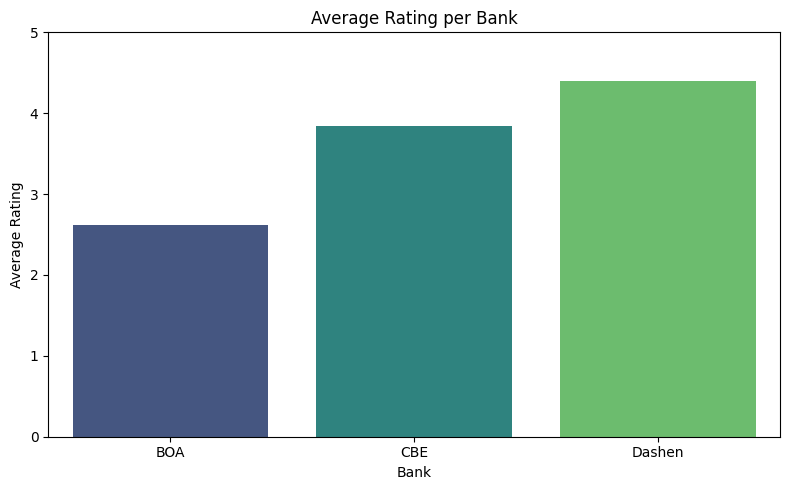

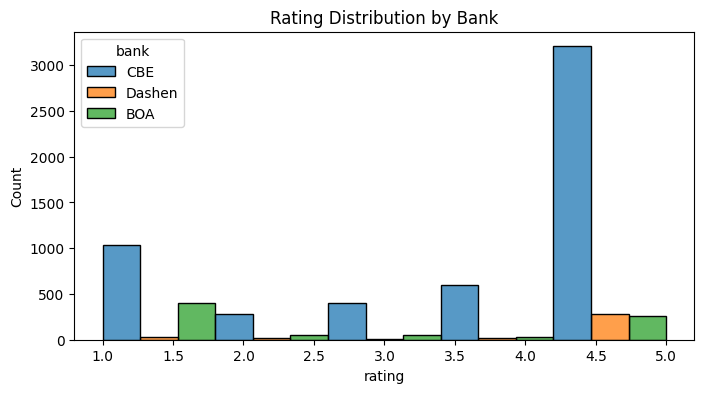

<Figure size 800x400 with 0 Axes>

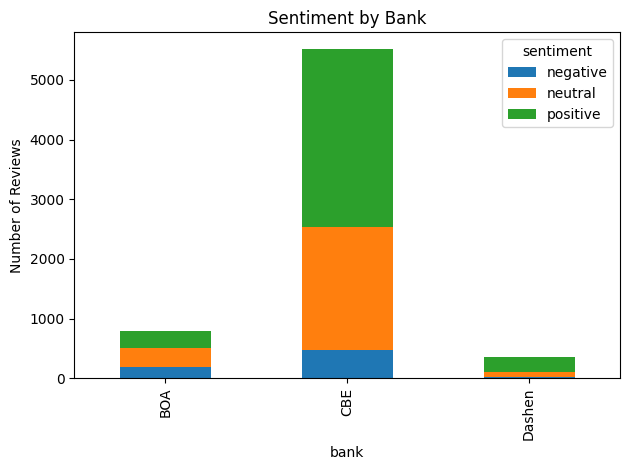

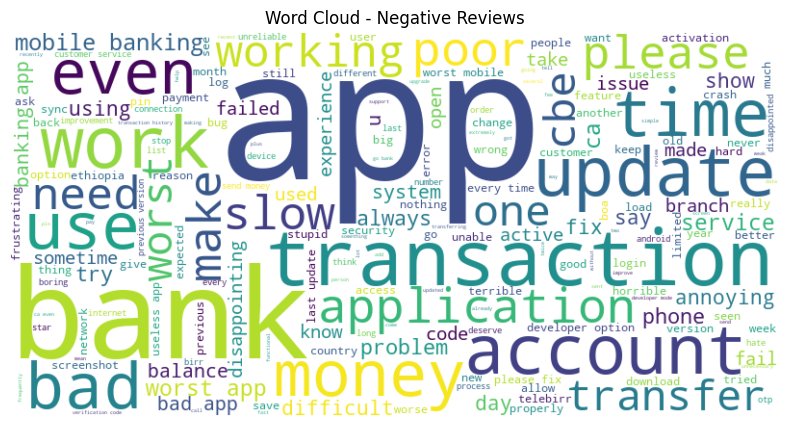

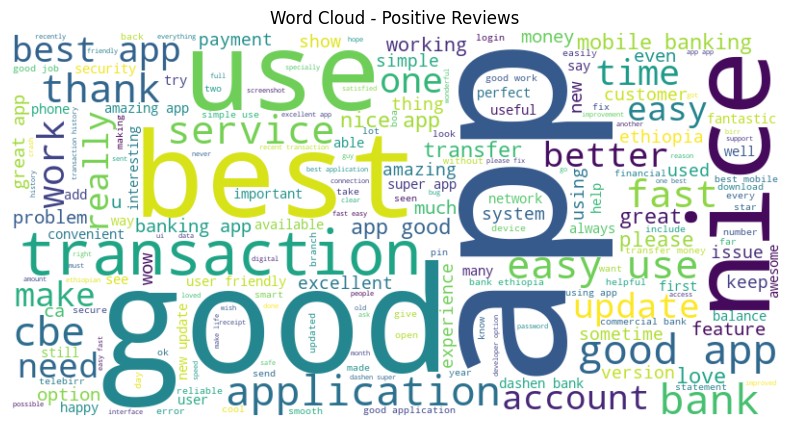

In [11]:
# Group by bank and calculate average rating
avg_rating = df.groupby('bank')['rating'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rating, x='bank', y='rating', palette='viridis')
plt.title("Average Rating per Bank")
plt.ylabel("Average Rating")
plt.xlabel("Bank")
plt.ylim(0, 5)
plt.tight_layout()
plt.savefig("average_rating_per_bank.png")
plt.show()


# Rating distributions
plt.figure(figsize=(8,4))
sns.histplot(df, x='rating', hue='bank', multiple='dodge', bins=5)
plt.title("Rating Distribution by Bank")
plt.savefig("rating_distribution.png")
plt.show()

# Sentiment count per bank
plt.figure(figsize=(8,4))
df.groupby(['bank', 'sentiment']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Sentiment by Bank")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.savefig("sentiment_by_bank.png")
plt.show()

# Word cloud for negative reviews
negative_text = " ".join(df[df['sentiment'] == 'negative']['processed_review'])
wc = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Negative Reviews")
plt.savefig("negative_wordcloud.png")
plt.show()

# Word cloud for positive reviews
positive_text = " ".join(df[df['sentiment'] == 'positive']['processed_review'])
wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")
plt.savefig("positive_wordcloud.png")
plt.show()


### **Insights:**

* **CBE (Commercial Bank of Ethiopia):**

  * Has the **highest number of total reviews** by a large margin.
  * Most reviews are **positive**, but there’s also a **significant portion of neutral and negative** sentiments.
  * Interpretation: CBE’s app is widely used and generally well-received, but still has areas needing improvement.

* **BOA (Bank of Abyssinia):**

  * Moderate review volume.
  * Sentiment is more balanced but skews slightly **positive**.
  * Interpretation: Steady performance; not as widely adopted as CBE but gaining traction.

* **Dashen Bank:**

  * Has the **fewest reviews**.
  * Dominantly **positive**, which might indicate recent improvements or a smaller but more satisfied user base.
  * Interpretation: Could be under-marketed or underutilized despite good experience.


### **Recommendations:**

1. **For CBE:**

   * **Stability and reliability improvements** should be prioritized to convert neutral and negative feedback into positive.
   * Enhance **app onboarding/tutorials** to better support new users.

2. **For BOA:**

   * Continue enhancing **user experience** and introduce **personal finance features** to boost positive sentiment further.

3. **For Dashen:**

   * Invest in **marketing and user acquisition** to increase reach.
   * Maintain current feature quality to preserve positive feedback.

